In [10]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import crystalball

In [11]:
def gauss(x, amp, mu, sigma):
    return amp * norm.pdf(x, mu, sigma)

In [19]:
def fit_gaussian(b_tuple1, h_mass, hist_range=(0, 5600)):
    hist, bin_edges = np.histogram(h_mass, bins='auto', range=hist_range)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Initial guess for the parameters
    initial_guess = [max(hist), np.mean(h_mass), np.std(h_mass)]

    # Fit the Gaussian function to the histogram data
    popt, pcov = curve_fit(gauss, bin_centers, hist, p0=initial_guess)
    amp, mu, sigma = popt

    # R^2 value
    residuals = hist - gauss(bin_centers, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((hist - np.mean(hist))**2)
    r_squared = 1 - (ss_res / ss_tot)

    fit_eq = (
        f"Gaussian Fit Equation:\n"
        f"y = {amp:.2f} * exp(- (x - {mu:.2f})^2 / (2 * {sigma:.2f}^2))\n"
        f"Fitted parameters:\n"
        f"Amplitude (amp) = {amp:.2f}\n"
        f"Mean (mu) = {mu:.2f}\n"
        f"Standard Deviation (sigma) = {sigma:.2f}\n"
        f"R^2 = {r_squared:.3f}"
    )
    print(fit_eq)

    # Plot the histogram
    plt.hist(h_mass, bins='auto', range=hist_range, alpha=0.6, color='b', label='Data')

    # Plot the fitted Gaussian curve
    x_fit = np.linspace(hist_range[0], hist_range[1], 1000)
    y_fit = gauss(x_fit, *popt)
    plt.plot(x_fit, y_fit, 'r--', label='Gaussian fit')

    plt.title("Histogram with Gaussian Fit")
    plt.xlabel("Mass")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()

In [12]:
def fit_double_gaussian(b_tuple1, h_mass, hist_range=(0, 5600)):
    # Define a single Gaussian function
    def double_gauss(x, mu, amp1, amp2, sigma1, sigma2):
        return gauss(x, amp1, mu, sigma1) + gauss(x, amp2, mu, sigma2)

    # Create the histogram
    hist, bin_edges = np.histogram(h_mass, bins='auto', range=hist_range)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Initial guess for the parameters
    initial_guess = [np.mean(h_mass), max(hist), max(hist)/2, np.std(h_mass), np.std(h_mass)/2]

    # Fit the double Gaussian function to the histogram data
    popt, pcov = curve_fit(double_gauss, bin_centers, hist, p0=initial_guess)
    mu, amp1, amp2, sigma1, sigma2 = popt

    # R^2 value
    residuals = hist - double_gauss(bin_centers, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((hist - np.mean(hist))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Output the fit equation and parameters
    fit_eq = (
        f"Double Gaussian Fit Equation:\n"
        f"y = {amp1:.2f} * exp(- (x - {mu:.2f})^2 / (2 * {sigma1:.2f}^2)) + "
        f"{amp2:.2f} * exp(- (x - {mu:.2f})^2 / (2 * {sigma2:.2f}^2))\n"
        f"Fitted parameters:\n"
        f"Mean (mu) = {mu:.2f}\n"
        f"Amplitude 1 (amp1) = {amp1:.2f}\n"
        f"Standard Deviation 1 (sigma1) = {sigma1:.2f}\n"
        f"Amplitude 2 (amp2) = {amp2:.2f}\n"
        f"Standard Deviation 2 (sigma2) = {sigma2:.2f}\n"
        f"R^2 = {r_squared:.3f}"
    )
    print(fit_eq)

    # Plot the histogram
    plt.hist(h_mass, bins='auto', range=hist_range, alpha=0.6, color='b', label='Data')

    # Plot the fitted double Gaussian curve
    x_fit = np.linspace(hist_range[0], hist_range[1], 1000)
    y_fit = double_gauss(x_fit, *popt)
    plt.plot(x_fit, y_fit, 'r--', label='Double Gaussian fit')
    plt.title("Histogram with Double Gaussian Fit")
    plt.xlabel("Mass")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()

In [13]:
def fit_crystal_ball(b_tuple1, h_mass, hist_range=(0, 5600)):
    # Define the Crystal Ball function using scipy.stats.crystalball
    def crystal_ball(x, alpha, n, mu, sigma, N):
        return N * crystalball.pdf(x, beta=alpha, m=n, loc=mu, scale=sigma)

    # Create the histogram
    hist, bin_edges = np.histogram(h_mass, bins='auto', range=hist_range)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Initial guess for the parameters
    initial_guess = [1, 2, np.mean(h_mass), np.std(h_mass), max(hist)]

    # Fit the Crystal Ball function to the histogram data
    popt, pcov = curve_fit(crystal_ball, bin_centers, hist, p0=initial_guess)
    alpha, n, mu, sigma, N = popt

    # R^2 value
    residuals = hist - crystal_ball(bin_centers, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((hist - np.mean(hist))**2)
    r_squared = 1 - (ss_res / ss_tot)

    fit_eq = (
        f"Crystal Ball Fit Equation:\n"
        f"Fitted parameters:\n"
        f"Alpha (alpha) = {alpha:.2f}\n"
        f"Exponent (n) = {n:.2f}\n"
        f"Mean (mu) = {mu:.2f}\n"
        f"Standard Deviation (sigma) = {sigma:.2f}\n"
        f"Normalization (N) = {N:.2f}\n"
        f"R^2 = {r_squared:.3f}"
    )
    print(fit_eq)

    # Plot the histogram
    plt.hist(h_mass, bins='auto', range=hist_range, alpha=0.6, color='b', label='Data')

    # Plot the fitted Crystal Ball curve
    x_fit = np.linspace(hist_range[0], hist_range[1], 1000)
    y_fit = crystal_ball(x_fit, *popt)
    plt.plot(x_fit, y_fit, 'r--', label='Crystal Ball fit')

    plt.title("Histogram with Crystal Ball Fit")
    plt.xlabel("Mass")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()


In [14]:
b_tuple1 = uproot.open('tuples/2500_3_dtf.root:B/Tuple')
b_tuple2 = uproot.open('tuples/3500_3_dtf.root:B/Tuple')
h_mass=b_tuple1["H_MASS"].array()
h_mass2=b_tuple2["H_MASS"].array()

# Gaussian 

Gaussian Fit Equation:
y = 110535.96 * exp(- (x - 2486.67)^2 / (2 * 154.92^2))
Fitted parameters:
Amplitude (amp) = 110535.96
Mean (mu) = 2486.67
Standard Deviation (sigma) = 154.92
R^2 = 0.913


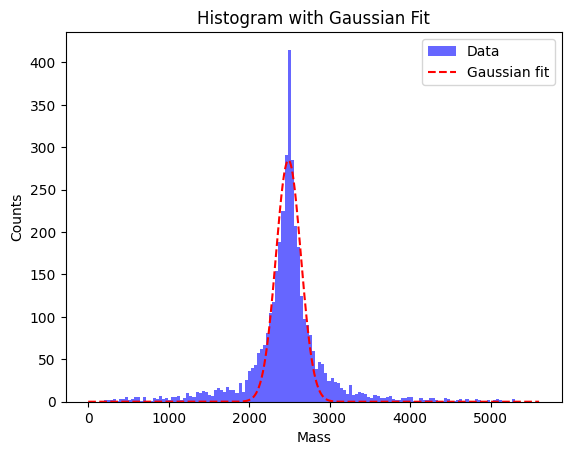

In [21]:
fit_gaussian(b_tuple1, h_mass) 

Gaussian Fit Equation:
y = 186430.70 * exp(- (x - 3481.16)^2 / (2 * 253.86^2))
Fitted parameters:
Amplitude (amp) = 186430.70
Mean (mu) = 3481.16
Standard Deviation (sigma) = 253.86
R^2 = 0.926


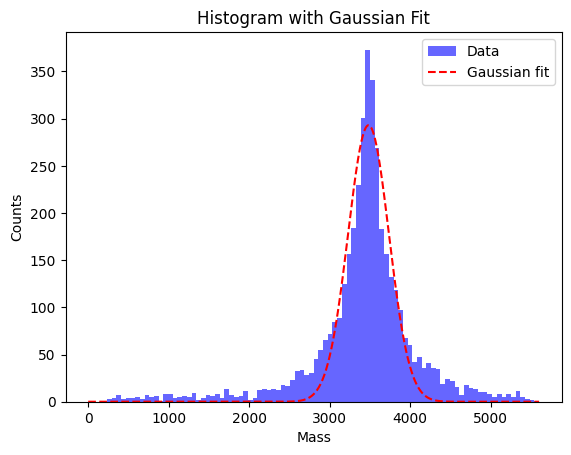

In [23]:
fit_gaussian(b_tuple2,h_mass2)

# Double Gaussian 

Double Gaussian Fit Equation:
y = 100481.71 * exp(- (x - 2491.79)^2 / (2 * 255.94^2)) + 26737.62 * exp(- (x - 2491.79)^2 / (2 * 48.12^2))
Fitted parameters:
Mean (mu) = 2491.79
Amplitude 1 (amp1) = 100481.71
Standard Deviation 1 (sigma1) = 255.94
Amplitude 2 (amp2) = 26737.62
Standard Deviation 2 (sigma2) = 48.12
R^2 = 0.977


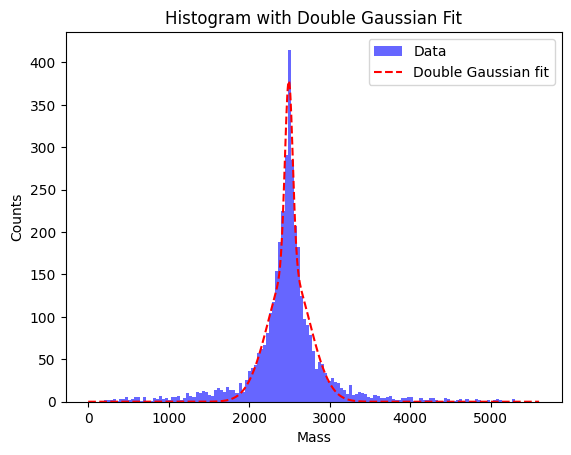

In [15]:
fit_double_gaussian(b_tuple1, h_mass) 

Double Gaussian Fit Equation:
y = 154864.63 * exp(- (x - 3482.13)^2 / (2 * 480.20^2)) + 64184.22 * exp(- (x - 3482.13)^2 / (2 * 112.18^2))
Fitted parameters:
Mean (mu) = 3482.13
Amplitude 1 (amp1) = 154864.63
Standard Deviation 1 (sigma1) = 480.20
Amplitude 2 (amp2) = 64184.22
Standard Deviation 2 (sigma2) = 112.18
R^2 = 0.987


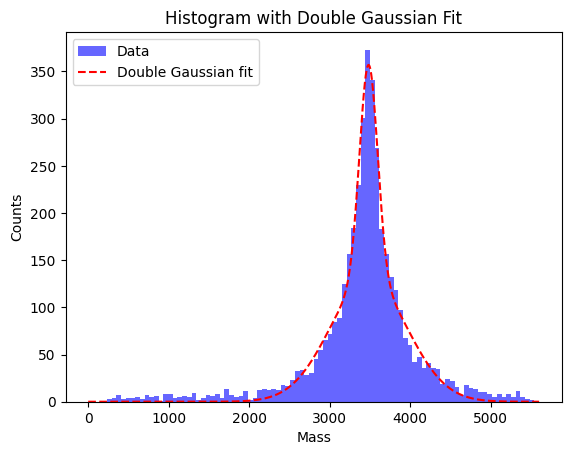

In [16]:
fit_double_gaussian(b_tuple2, h_mass2) 

# Crystal Ball

Crystal Ball Fit Equation:
Fitted parameters:
Alpha (alpha) = 0.93
Exponent (n) = 2.32
Mean (mu) = 2495.93
Standard Deviation (sigma) = 126.56
Normalization (N) = 128614.03
R^2 = 0.939


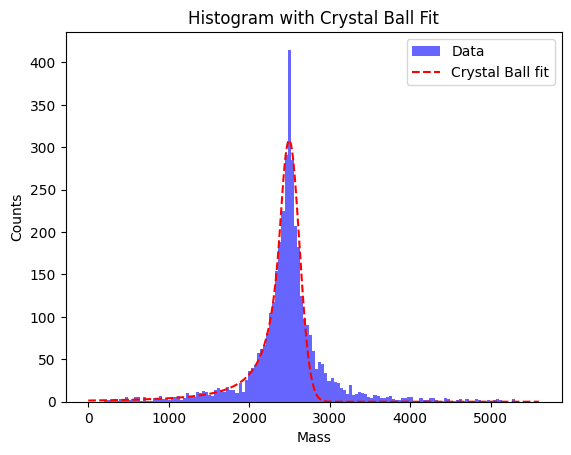

In [17]:
fit_crystal_ball(b_tuple1,h_mass)

Crystal Ball Fit Equation:
Fitted parameters:
Alpha (alpha) = 1.06
Exponent (n) = 2.11
Mean (mu) = 3490.96
Standard Deviation (sigma) = 221.62
Normalization (N) = 216941.79
R^2 = 0.949


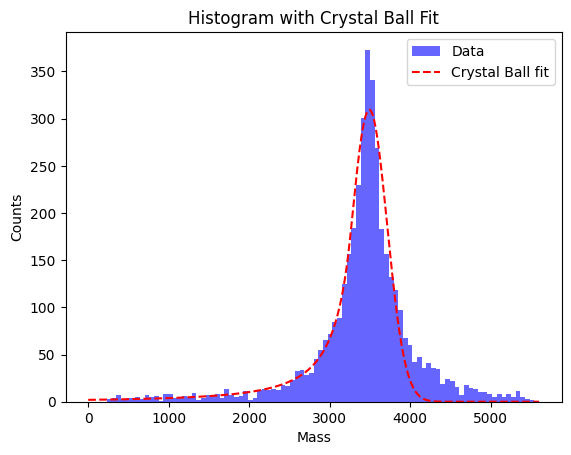

In [18]:
fit_crystal_ball(b_tuple2,h_mass2)